## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

## Importing dataset 

In [3]:
df=pd.read_csv("D:\LLM\loan_data_nov2023.csv")
df.head()

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.65,B,10,RENT,24000.0,33
1,0,2400,10.99,C,25,RENT,12252.0,31
2,0,10000,13.49,C,13,RENT,49200.0,24
3,0,5000,10.99,A,3,RENT,36000.0,39
4,0,3000,10.99,E,9,RENT,48000.0,24


In [4]:
df=df.drop('default',axis='columns')

In [5]:
df.tail(5)

,amount,interest,grade,years,ownership,income,age
29086,2500,8.07,A,4,MORTGAGE,110000.0,27
29087,8500,10.28,C,3,RENT,18000.0,25
29088,5000,8.07,A,0,MORTGAGE,100000.0,27
29089,5000,7.43,A,0,MORTGAGE,200000.0,23
29090,7500,10.99,E,0,OWN,22000.0,25


In [6]:
df.isnull().sum()

amount       0
interest     0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,29091.0,9593.663848,6323.467488,500.00,5000.00,8000.00,12250.00,35000.00
interest,29091.0,11.003117,3.080636,5.42,8.49,10.99,13.11,23.22
years,29091.0,6.085422,6.593591,0.00,2.00,4.00,8.00,62.00
income,29091.0,66964.892167,53253.176277,4000.00,40000.00,56400.00,80000.00,2039784.00
age,29091.0,27.698120,6.194617,20.00,23.00,26.00,30.00,94.00


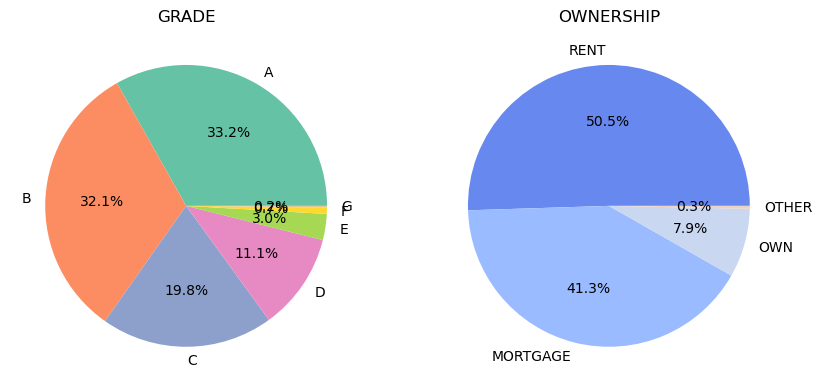

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
origin_counts=df['grade'].value_counts()
plt.title('GRADE')
color=sns.color_palette('Set2')
plt.pie(x=origin_counts.values,labels=origin_counts.index,autopct='%1.1f%%',colors=color)

plt.subplot(1,2,2)
destination_counts=df['ownership'].value_counts()
plt.title('OWNERSHIP')
color=sns.color_palette('coolwarm')
plt.pie(x=destination_counts.values,labels=destination_counts.index,autopct='%1.1f%%',colors=color)

plt.show()

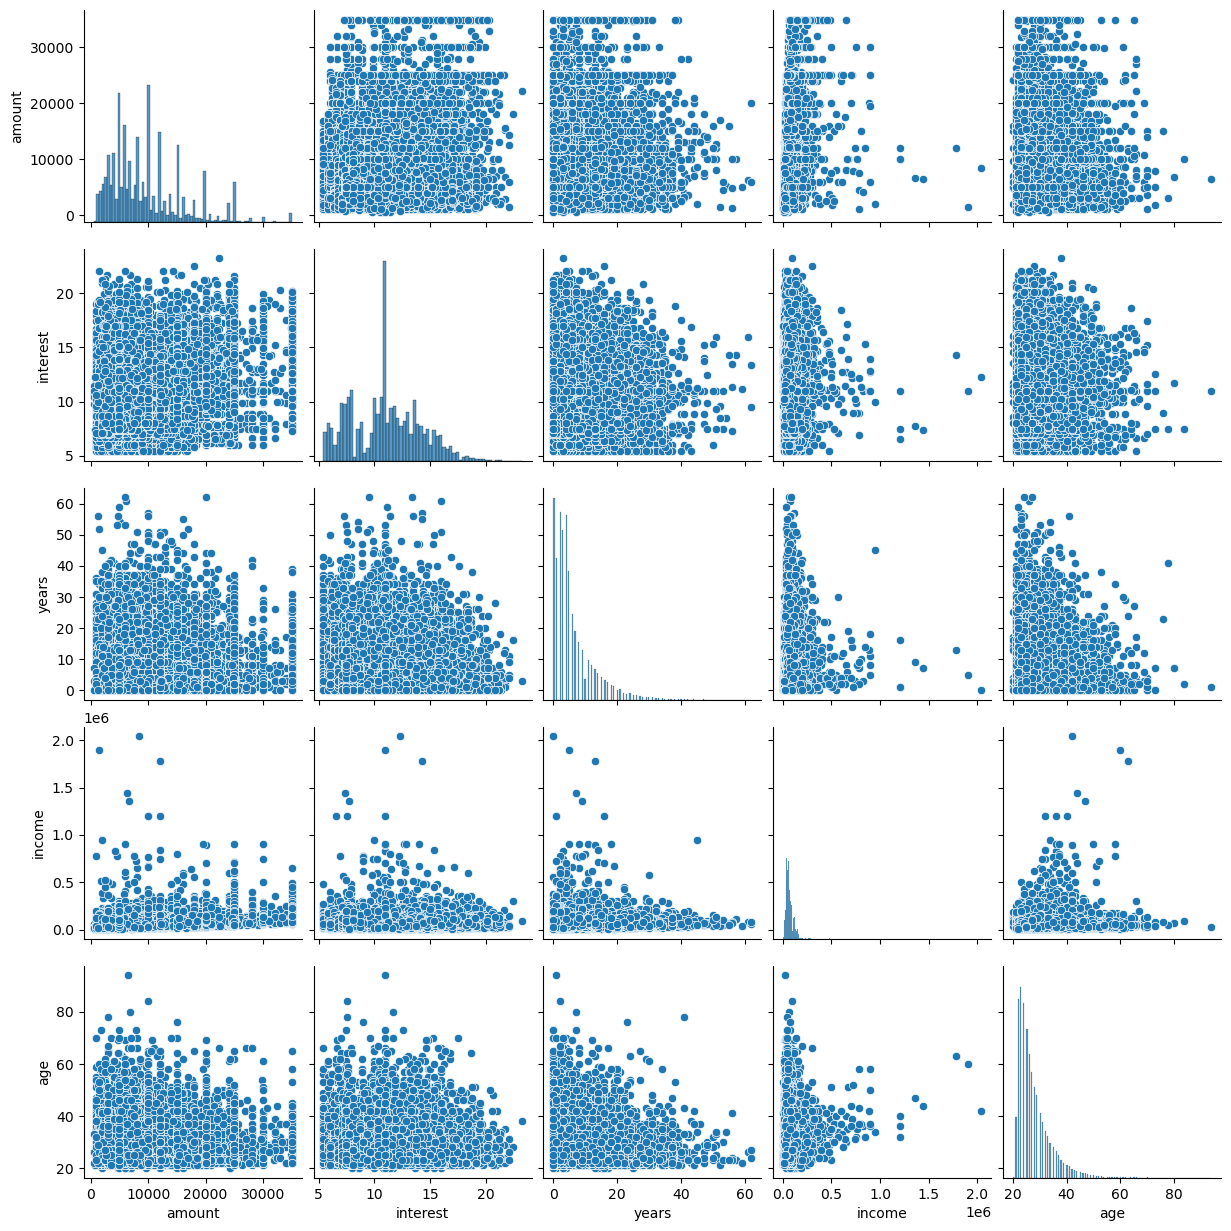

In [8]:
sns.pairplot(df)

## Correlation between the variables

In [9]:
cor=df.corr()

In [10]:
cor

,amount,interest,years,income,age
amount,1.000000,0.137728,0.091639,0.322874,0.049983
interest,0.137728,1.000000,-0.054653,0.020847,0.010089
years,0.091639,-0.054653,1.000000,0.121390,0.015617
income,0.322874,0.020847,0.121390,1.000000,0.140343
age,0.049983,0.010089,0.015617,0.140343,1.000000


<AxesSubplot:>

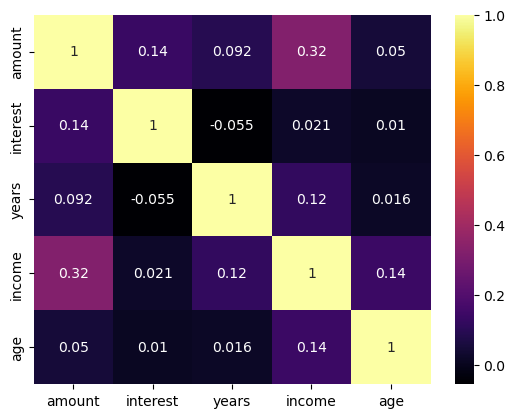

In [10]:
sns.heatmap(cor, cmap='inferno', annot=True)s

## Standardizing the numerical columns

In [27]:
col = ['amount','interest', 'years', 'income', 'age']
scaler = StandardScaler()

# Standardize the numeric features
df[col] = scaler.fit_transform(df[col])
df

,amount,interest,grade,years,ownership,income,age
0,-0.726459,-0.114627,1,0.593705,3,-0.806818,0.855900
1,-1.137633,-0.004258,2,2.868680,3,-1.027429,0.533033
2,0.064260,0.807277,2,1.048700,3,-0.333599,-0.596999
3,-0.726459,-0.004258,0,-0.467951,3,-0.581476,1.824499
4,-1.042747,-0.004258,4,0.442040,3,-0.356133,-0.596999
...,...,...,...,...,...,...,...
29086,-1.121819,-0.952131,0,-0.316286,0,0.808137,-0.112700
29087,-0.172956,-0.234734,2,-0.467951,3,-0.919489,-0.435566
29088,-0.726459,-0.952131,0,-0.922946,0,0.620351,-0.112700
29089,-0.726459,-1.159883,0,-0.922946,0,2.498206,-0.758433


## Conversion of categorical data into numerical data using LabelEncoder

In [12]:
le=LabelEncoder()
dfle=df
dfle.grade=le.fit_transform(dfle.grade)
dfle.ownership=le.fit_transform(dfle.ownership)
dfle

,amount,interest,grade,years,ownership,income,age
0,-0.726459,-0.114627,1,0.593705,3,-0.806818,0.855900
1,-1.137633,-0.004258,2,2.868680,3,-1.027429,0.533033
2,0.064260,0.807277,2,1.048700,3,-0.333599,-0.596999
3,-0.726459,-0.004258,0,-0.467951,3,-0.581476,1.824499
4,-1.042747,-0.004258,4,0.442040,3,-0.356133,-0.596999
...,...,...,...,...,...,...,...
29086,-1.121819,-0.952131,0,-0.316286,0,0.808137,-0.112700
29087,-0.172956,-0.234734,2,-0.467951,3,-0.919489,-0.435566
29088,-0.726459,-0.952131,0,-0.922946,0,0.620351,-0.112700
29089,-0.726459,-1.159883,0,-0.922946,0,2.498206,-0.758433


In [13]:
target=dfle.amount

In [14]:
features=dfle.drop('amount',axis='columns')

In [15]:
#spliting of dataset as train and test
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=50)

In [16]:
len(x_train)

23272

In [17]:
len(x_test)

5819

## Fitting our model in linear regression algorithm

In [18]:
model = LinearRegression()

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test)

In [21]:
#generating model score
model.score(x_test,y_test)

0.12596721258472177

In [22]:
r=r2_score(y_test,y_pred)
r

0.12596721258472177

In [23]:
mse=mean_squared_error(y_test,y_pred)
mse

0.8484467819133702

## Conversion of categorical data into numerical data using OneHotEncoder

In [24]:
df2 = pd.get_dummies(df, columns=['grade', 'ownership'])

In [25]:
df2

,amount,interest,years,income,age,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,ownership_0,ownership_1,ownership_2,ownership_3
0,-0.726459,-0.114627,0.593705,-0.806818,0.855900,0,1,0,0,0,0,0,0,0,0,1
1,-1.137633,-0.004258,2.868680,-1.027429,0.533033,0,0,1,0,0,0,0,0,0,0,1
2,0.064260,0.807277,1.048700,-0.333599,-0.596999,0,0,1,0,0,0,0,0,0,0,1
3,-0.726459,-0.004258,-0.467951,-0.581476,1.824499,1,0,0,0,0,0,0,0,0,0,1
4,-1.042747,-0.004258,0.442040,-0.356133,-0.596999,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29086,-1.121819,-0.952131,-0.316286,0.808137,-0.112700,1,0,0,0,0,0,0,1,0,0,0
29087,-0.172956,-0.234734,-0.467951,-0.919489,-0.435566,0,0,1,0,0,0,0,0,0,0,1
29088,-0.726459,-0.952131,-0.922946,0.620351,-0.112700,1,0,0,0,0,0,0,1,0,0,0
29089,-0.726459,-1.159883,-0.922946,2.498206,-0.758433,1,0,0,0,0,0,0,1,0,0,0


In [26]:
col = ['amount','interest', 'years', 'income', 'age']
scaler = StandardScaler()

# Standardize the numeric features
df2[col] = scaler.fit_transform(df2[col])
df2

,amount,interest,years,income,age,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,ownership_0,ownership_1,ownership_2,ownership_3
0,-0.726459,-0.114627,0.593705,-0.806818,0.855900,0,1,0,0,0,0,0,0,0,0,1
1,-1.137633,-0.004258,2.868680,-1.027429,0.533033,0,0,1,0,0,0,0,0,0,0,1
2,0.064260,0.807277,1.048700,-0.333599,-0.596999,0,0,1,0,0,0,0,0,0,0,1
3,-0.726459,-0.004258,-0.467951,-0.581476,1.824499,1,0,0,0,0,0,0,0,0,0,1
4,-1.042747,-0.004258,0.442040,-0.356133,-0.596999,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29086,-1.121819,-0.952131,-0.316286,0.808137,-0.112700,1,0,0,0,0,0,0,1,0,0,0
29087,-0.172956,-0.234734,-0.467951,-0.919489,-0.435566,0,0,1,0,0,0,0,0,0,0,1
29088,-0.726459,-0.952131,-0.922946,0.620351,-0.112700,1,0,0,0,0,0,0,1,0,0,0
29089,-0.726459,-1.159883,-0.922946,2.498206,-0.758433,1,0,0,0,0,0,0,1,0,0,0


In [28]:
Y=df2.amount

In [29]:
X=df2.drop('amount',axis='columns')

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=50)

In [31]:
model = LinearRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [32]:
mse

0.8442415940046748

In [33]:
r2

0.13029921335105565